In [175]:
import numpy as np
import networkx as nx

from scipy import linalg

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

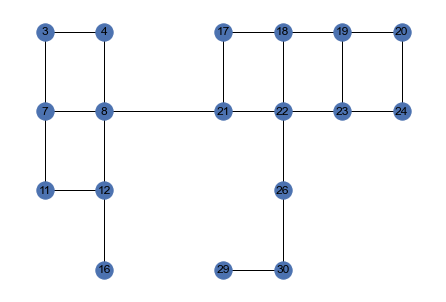

In [255]:
def get_default_adjacency_matrix():
    res = np.zeros((32, 32))
    # Горизонтальные ребра внутри квадратов
    for i in range(3):
        for j in range(8):
            res[i+4*j, i+4*j+1] = 1
    # Вертикальные ребра внутри квадратов
    for i in range(4):
        for j in range(3):
            res[i+4*j, i+4*j+4] = 1
        for j in range(4, 7):
            res[i+4*j, i+4*j+4] = 1
    # Горизонтальные соединительные ребра
    for i in range(4):
        res[4*(i+1)-1, 16 + 4*i] = 1
    return res


def form_graph(adj_matr, stop_list_nodes=[], stop_list_edges=[]):
    G = nx.Graph()
    sqr_side = int(np.sqrt(adj_matr.shape[0] / 2))
    for i in range(1, sqr_side+1):
        for j in range(0, sqr_side):
            if (i + sqr_side*j) not in stop_list_nodes:
                G.add_node(i + sqr_side*j, pos=(i, sqr_side - j))
            if (sqr_side**2 + i + sqr_side*j) not in stop_list_nodes:
                G.add_node(sqr_side**2 + i + sqr_side*j, pos=(sqr_side + 1 + i, sqr_side - j))
    for i in range(adj_matr.shape[0]):
        for j in range(i, adj_matr.shape[0]):
            if (i+1 not in stop_list_nodes) and (j+1 not in stop_list_nodes) and ([i+1, j+1] not in stop_list_edges):
                if (adj_matr[i, j] == 1):
                    G.add_edge(i+1, j+1)
    H = nx.Graph()
    H.add_nodes_from(sorted(G.nodes(data=True)))
    H.add_edges_from(G.edges(data=True))
    return H


def print_graph(G, color_map=None):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_color=color_map)
    
removed_nodes = [1, 2, 5, 6, 9, 10, 13, 14, 15, 25, 27, 28, 31, 32]    # 26 и 27 оставим, а то развалится
#removed_nodes = []
removed_edges = [[4, 17], [12, 25], [16, 29]]
#removed_edges = []
G = form_graph(get_default_adjacency_matrix(), removed_nodes, removed_edges)
print_graph(G)

 [ 3  4  7  8 11 12 16 17 18 19 20 21 22 23 24 26 29 30]
[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]]


C:\Users\Jojo\AppData\Local\Temp/ipykernel_13116/1178967009.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


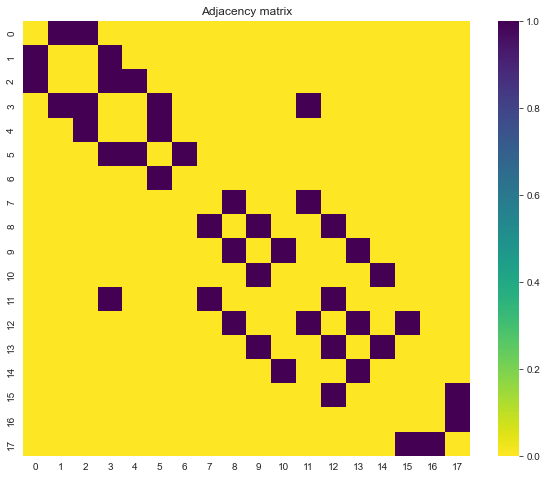

In [256]:
# Матрица смежности
A = nx.adjacency_matrix(G).todense()
node_idxs = np.array(G.nodes())
print('', node_idxs)
print(A)

# Plot as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(A, ax=ax, cmap='viridis_r')
ax.set(title='Adjacency matrix');

In [257]:
# Матрица степеней вершин
B = np.zeros(A.shape, dtype=np.int32)
diags = np.sum(A, axis=0).tolist()[0]
np.fill_diagonal(B, diags)
print('     ', node_idxs)
B

      [ 3  4  7  8 11 12 16 17 18 19 20 21 22 23 24 26 29 30]


array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

[ 3  4  7  8 11 12 16 17 18 19 20 21 22 23 24 26 29 30]
[[ 2 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  2  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0  3 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1 -1  4  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 -1  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  3 -1  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  3 -1  0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  2  0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0 -1  0  0  0  3 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0  0 -1  4 -1  0 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0  0 -1  3 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  2  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0 

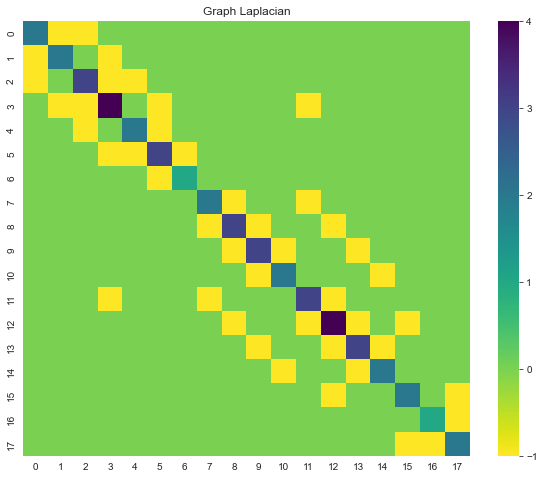

In [258]:
# Матрица Лапласа (ака матрица Кирхгофа)
L = B - A
print(node_idxs)
print(L)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(L, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

[[False False False False False False False  True  True  True  True False
   True  True  True  True  True  True]] [[ True  True  True  True  True  True  True False False False False  True
  False False False False False False]]
[17 18 19 20 22 23 24 26 29 30] [ 3  4  7  8 11 12 16 21]


C:\Users\Jojo\AppData\Local\Temp/ipykernel_13116/2079156272.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  first_cluster, second_cluster = node_idxs[first_cluster_idxs.tolist()], node_idxs[second_cluster_idxs.tolist()]


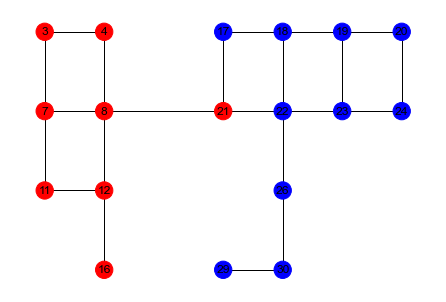

In [260]:
# Делим

def bisection(L):
    eigvals, eigvecs = np.linalg.eig(L)
    sec_eigval, sec_eigvec = sorted(zip(eigvals, eigvecs.transpose()), key=lambda x: x[0])[1]
    first_cluster = np.sign(sec_eigvec) > 0
    second_cluster = np.sign(sec_eigvec) <= 0
    return first_cluster, second_cluster

first_cluster_idxs, second_cluster_idxs = bisection(L)
first_cluster, second_cluster = node_idxs[first_cluster_idxs.tolist()], node_idxs[second_cluster_idxs.tolist()]

print(first_cluster_idxs, second_cluster_idxs)
print(first_cluster, second_cluster)

# Закрашиваем
color_map = []
for node in G:
    if node in first_cluster:
        color_map.append('blue')
    else: 
        color_map.append('red')
print_graph(G, color_map)